## Dataset and Imports
Let's start by importing the packages required and loading the datatset

In [3]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline

from matplotlib import pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import sklearn.cross_validation as skcv
from pandas_ml import ConfusionMatrix

We use the wine quality data set from UCI Machine Learning Repo. Here we try to model wine quality based on physicochemical tests

In [4]:
winedata=pd.read_csv("winequality-white.csv", sep=";")
winedata.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


(array([   20.,   163.,  1457.,  2198.,   880.,   175.,     5.]),
 array([ 2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5]),
 <a list of 7 Patch objects>)

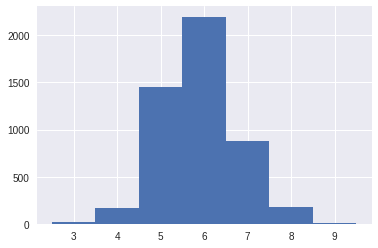

In [25]:
plt.hist(winedata.quality, bins=[2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5])

Clearly, wines with quality 3 or 9 is very small. So we try to build model that can predict wines of quality 4 through 8

## Exploratory Analysis

Let's start with looking at how the features are distributed

0
0
0
1
1
1
2
2
2
3
3


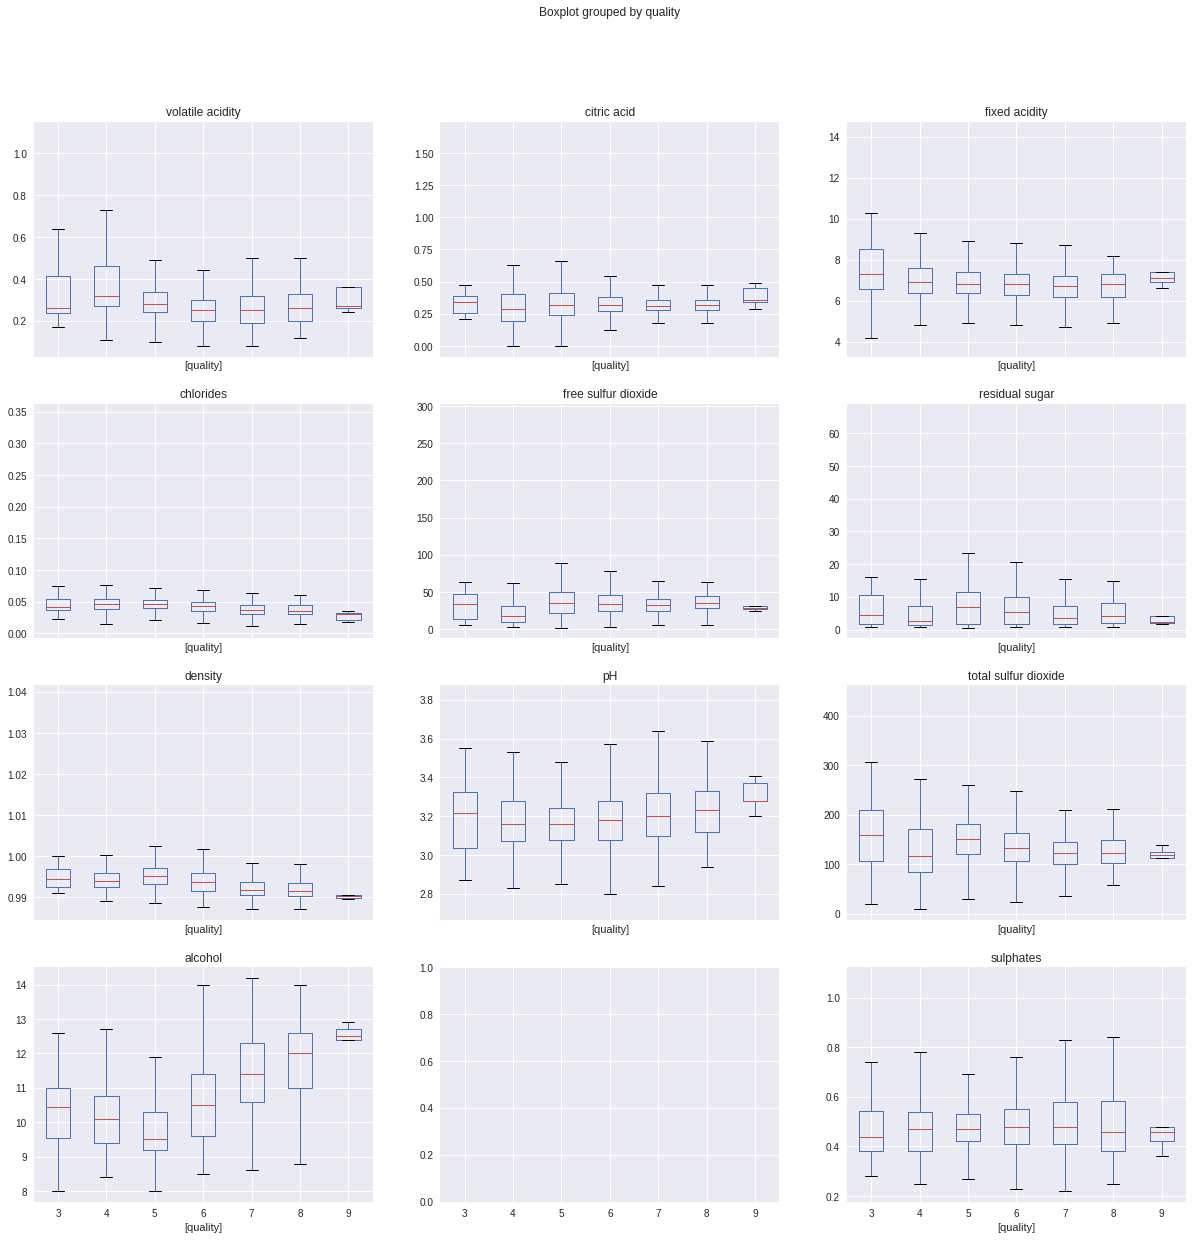

In [128]:
fig,ax=plt.subplots(nrows=4,ncols=3, sharex=True, sharey=False, figsize=(20,20))

for colnum in range(0,winedata.shape[1]-1):
    print(colnum/3)
    winedata.ix[:,[colnum,11]].boxplot(ax=ax[colnum/3,(colnum%3)-1],by="quality", figsize=(10,10))

Some observations, 
1. Lesser volatile acidity seems to indicate the wine being rated higher 
2. Better rated wine tend to have higher pH values
3. 

In [44]:
winedata.corr().round(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000,-0.023,0.289,0.089,0.023,-0.049,0.091,0.265,-0.426,-0.017,-0.121,-0.114
volatile acidity,-0.023,1.000,-0.149,0.064,0.071,-0.097,0.089,0.027,-0.032,-0.036,0.068,-0.195
citric acid,0.289,-0.149,1.000,0.094,0.114,0.094,0.121,0.150,-0.164,0.062,-0.076,-0.009
residual sugar,0.089,0.064,0.094,1.000,0.089,0.299,0.401,0.839,-0.194,-0.027,-0.451,-0.098
chlorides,0.023,0.071,0.114,0.089,1.000,0.101,0.199,0.257,-0.090,0.017,-0.360,-0.210
free sulfur dioxide,-0.049,-0.097,0.094,0.299,0.101,1.000,0.616,0.294,-0.001,0.059,-0.250,0.008
total sulfur dioxide,0.091,0.089,0.121,0.401,0.199,0.616,1.000,0.530,0.002,0.135,-0.449,-0.175
density,0.265,0.027,0.150,0.839,0.257,0.294,0.530,1.000,-0.094,0.074,-0.780,-0.307
pH,-0.426,-0.032,-0.164,-0.194,-0.090,-0.001,0.002,-0.094,1.000,0.156,0.121,0.099
sulphates,-0.017,-0.036,0.062,-0.027,0.017,0.059,0.135,0.074,0.156,1.000,-0.017,0.054


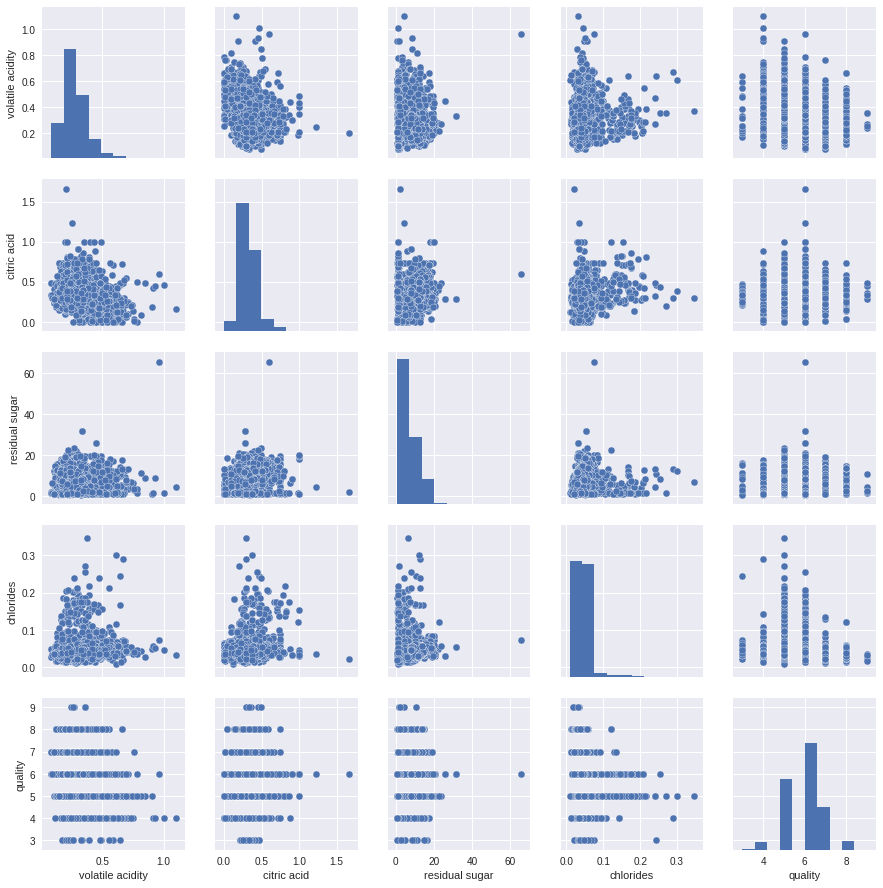

In [40]:
plt.figure(figsize=(10,10))
fig_1=sns.pairplot(winedata.ix[:,[1,2,3,4,11]])
plt.show()

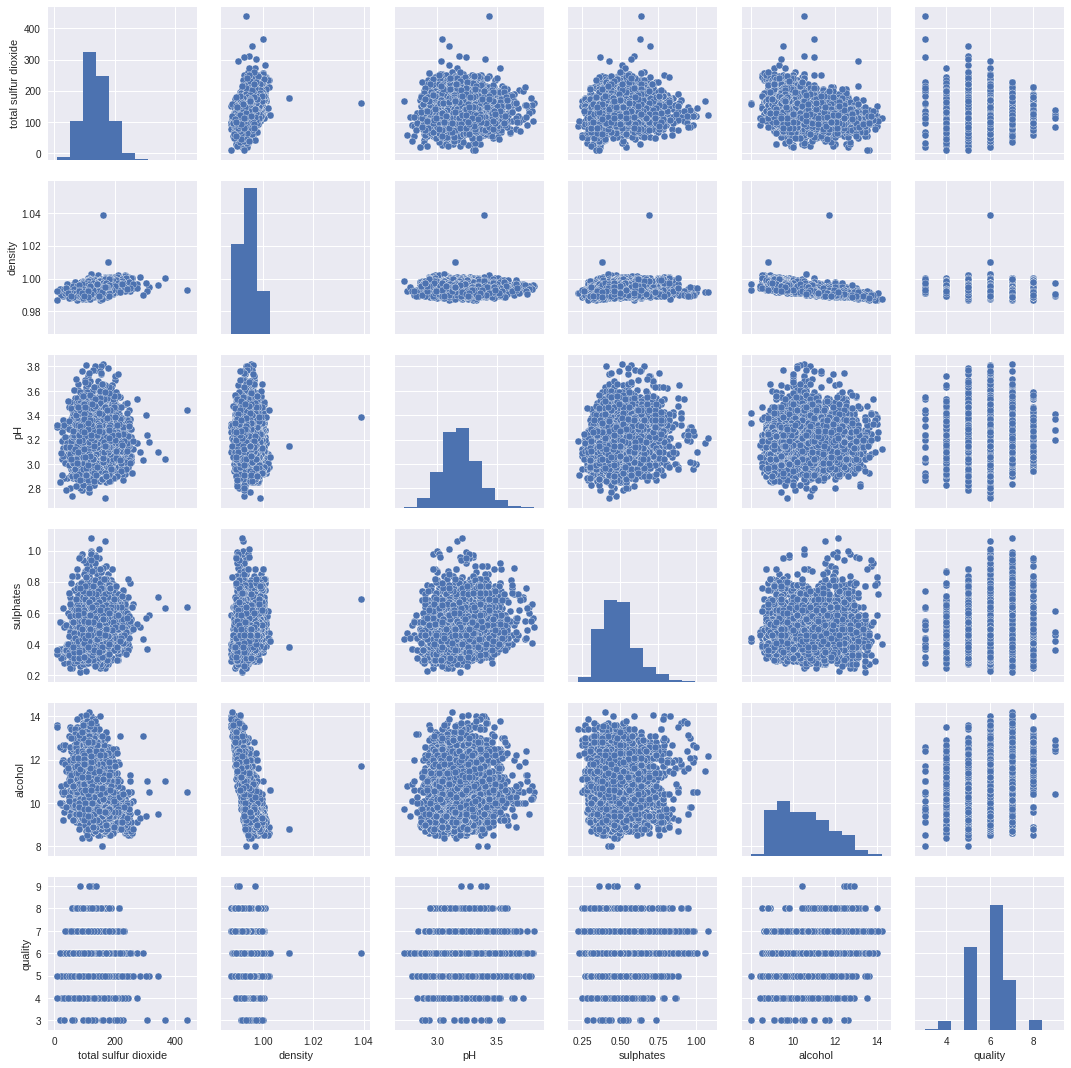

In [37]:
plt.figure(figsize=(10,10))
fig_1=sns.pairplot(winedata.ix[:,6:])
plt.show()